In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('Power_Consumption.txt', delimiter=';', parse_dates={'Datetime': ['Date', 'Time']}, 
                   infer_datetime_format=True, low_memory=False)
data.head()

C:\Users\Arsh Chadha\AppData\Local\Temp\ipykernel_11424\3632080071.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('Power_Consumption.txt', delimiter=';', parse_dates={'Datetime': ['Date', 'Time']},
C:\Users\Arsh Chadha\AppData\Local\Temp\ipykernel_11424\3632080071.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('Power_Consumption.txt', delimiter=';', parse_dates={'Datetime': ['Date', 'Time']},


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

# Set Datetime as index
data.set_index('Datetime', inplace=True)

#data.head()

# Convert the necessary columns to numeric
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

#data.head()

# Normalize the 'Global_active_power' column
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Global_active_power']])

# Convert scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=['Global_active_power'], index=data.index)

data_scaled.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,0.374796
2006-12-16 17:25:00,0.478363
2006-12-16 17:26:00,0.479631
2006-12-16 17:27:00,0.480898
2006-12-16 17:28:00,0.325005


In [15]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])  # Input sequence
        y.append(data[i+time_steps, 0])    # Output (next value)
    return np.array(X), np.array(y)

In [16]:
# Create sequences of 60 minutes (1 hour)
X, y = create_sequences(data_scaled.values)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [17]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add a Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Arsh Chadha\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 744s 14ms/step - loss: 6.8575e-04 - val_loss: 3.9051e-04
Epoch 2/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 759s 15ms/step - loss: 5.9245e-04 - val_loss: 3.8906e-04
Epoch 3/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 729s 14ms/step - loss: 5.7185e-04 - val_loss: 3.7185e-04
Epoch 4/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 751s 15ms/step - loss: 5.4545e-04 - val_loss: 3.6343e-04
Epoch 5/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 740s 14ms/step - loss: 5.3263e-04 - val_loss: 3.6021e-04
Epoch 6/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 730s 14ms/step - loss: 5.2806e-04 - val_loss: 3.5715e-04
Epoch 7/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 734s 14ms/step - loss: 5.2263e-04 - val_loss: 3.5625e-04
Epoch 8/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 745s 15ms/step - loss: 5.1153e-04 - val_loss: 3.5431e-04
Epoch 9/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 732s 14ms/step - loss: 5.1112e-04 - val_loss: 3.5524e-04
Epoch 10/10
51231/51231 ━━━━━━━━━━━━━━━━━━━━ 737s 14ms/step - loss: 5.0819e-04 - val_loss: 

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step
Root Mean Squared Error: 0.20566730778671685


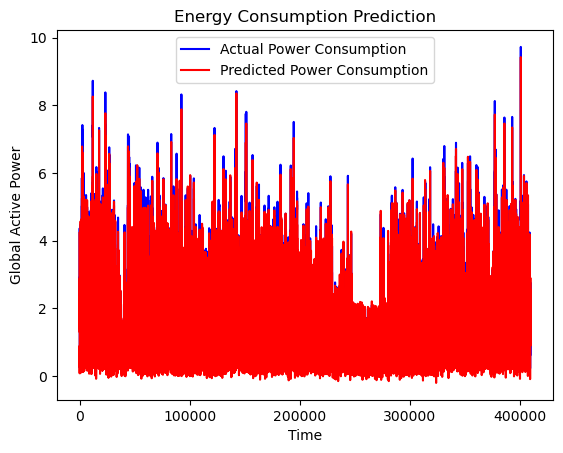

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'Root Mean Squared Error: {rmse}')

# Plot the predictions vs actual values
plt.plot(y_test_rescaled, color='blue', label='Actual Power Consumption')
plt.plot(y_pred_rescaled, color='red', label='Predicted Power Consumption')
plt.title('Energy Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [20]:
data_scaled.head()

,Global_active_power
Datetime,
2006-12-16 17:24:00,0.374796
2006-12-16 17:25:00,0.478363
2006-12-16 17:26:00,0.479631
2006-12-16 17:27:00,0.480898
2006-12-16 17:28:00,0.325005
